In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
# Import necessary libraries for confusion matrix and decision tree visualization
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


In [2]:
# Load the dataset
dataset_path = '/content/student_skills_languages_dataset_with_approval.xlsx'  # Update with your file path
df = pd.read_excel(dataset_path)
df.drop(columns=['Student_ID'], inplace=True)
df.drop(columns=['Extra_Curricular'], inplace=True)
df = df.applymap(lambda x: x.replace(' months', '') if isinstance(x, str) else x)
df



<ipython-input-2-c89023012169>:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.replace(' months', '') if isinstance(x, str) else x)


,CGPA,Bachelors_Degree,Skills,Languages,Job_Experience,Duration_of_Internship_or_Job,Research_Paper,Approval_Status
0,3.88,Robotics,"SQL, Artificial Intelligence, Web Development","R, C",Software Developer,13,Yes,Accepted
1,2.47,Computer Engineering,"Artificial Intelligence, SQL, Computer Network...",Ruby,Hardware Engineer,4,Yes,Rejected
2,3.72,Mechanical Engineering,"DevOps, SQL, Operating Systems, Cloud Computing","C++, JavaScript",Systems Engineer,16,Yes,Accepted
3,3.29,Software Engineering,"PostgreSQL, Operating Systems, Machine Learnin...",R,Systems Engineer,15,Yes,Accepted
4,3.18,Mechanical Engineering,"Computer Networks, Cloud Computing, PostgreSQL...","C, JavaScript",Network Engineer,15,Yes,Accepted
...,...,...,...,...,...,...,...,...
6995,3.74,Software Engineering,"Machine Learning, PostgreSQL, Operating System...","C++, C, Ruby",Research Assistant,8,Yes,Accepted
6996,3.88,Civil Engineering,"DevOps, PostgreSQL, Operating Systems",C++,Network Engineer,19,Yes,Accepted
6997,4.00,Electrical Engineering,"SQL, DevOps, Data Structures & Algorithms (DSA)","C++, Ruby, Java",Software Developer,21,No,Accepted
6998,3.09,Computer Engineering,"SQL, Artificial Intelligence, Operating System...","R, C++, C",Data Analyst,18,No,Accepted


In [3]:
required_degree = "Software Engineering"
required_skills = ["SQL", "Artificial Intelligence", "Cloud Computing", "Operating Systems", "DevOps"]
required_languages = ["Python", "Java", "C++", "JavaScript"]


In [15]:
# Convert the 'Duration_of_Internship_or_Job' column to numeric
df['Duration_of_Internship_or_Job'] = pd.to_numeric(df['Duration_of_Internship_or_Job'], errors='coerce').fillna(0)

# List of valid degrees
valid_degrees = [
    'Robotics', 'Computer Engineering', 'Mechanical Engineering', 'Software Engineering',
    'Information Technology', 'Electrical Engineering', 'Chemical Engineering',
    'Data Science', 'Civil Engineering', 'Artificial Intelligence'
]

# Function to calculate score and percentage score based on the new criteria
def calculate_percentage_score(row):
    score = 0

    # Degree matching (10 points)
    if row['Bachelors_Degree'] in valid_degrees:
        score += 10

    # Skills matching (1 point for each matching skill)
    student_skills = set([skill.strip() for skill in row['Skills'].split(',')])
    matching_skills = student_skills.intersection(set(required_skills))
    score += len(matching_skills)

    # Languages matching (1 point for each matching language)
    student_languages = set([lang.strip() for lang in row['Languages'].split(',')])
    matching_languages = student_languages.intersection(set(required_languages))
    score += len(matching_languages)

    # Research paper consideration (5 points if the student has published a research paper)
    if row['Research_Paper'].strip().lower() == 'yes':
        score += 5

    # CGPA score calculation
    cgpa = row['CGPA']
    if cgpa > 3.7:
        score += 10
    elif cgpa > 3.4:
        score += 9
    elif cgpa > 3.1:
        score += 8
    elif cgpa > 2.8:
        score += 7
    elif cgpa > 2.4:
        score += 6
    else:
        score += 5

    # Internship/Job Duration score calculation
    duration = row['Duration_of_Internship_or_Job']
    if duration > 24:
        score += 10
    elif duration > 20:
        score += 9
    elif duration > 16:
        score += 8
    elif duration > 12:
        score += 7
    elif duration > 8:
        score += 6
    else:
        score += 5

    # Maximum possible score considering all factors
    max_possible_score = 57  # 10 for degree, 10 for CGPA, 10 for duration, 10 for skills, 7 for languages, 5 for research paper

    # Calculate the percentage score
    percentage_score = (score / max_possible_score) * 100

    return score, percentage_score

# Apply the updated percentage score calculation to each row in the dataset
df[['Score', 'Percentage_Score']] = df.apply(calculate_percentage_score, axis=1, result_type='expand')



In [16]:
# Apply the scoring function to each rowdata
df[['Score', 'Percentage_Score']] = df.apply(calculate_percentage_score, axis=1, result_type='expand')

In [17]:
# Convert categorical features into numerical form for machine learning
df['Approval_Status'] = df['Approval_Status'].map({'Accepted': 1, 'Rejected': 0})
df['Research_Paper'] = df['Research_Paper'].map({'Yes': 1, 'No': 0})


In [18]:
# Define the features (X) and the target variable (y)
X = df[['CGPA', 'Score']]  # Using CGPA and Score as features for now
y = df['Approval_Status']



In [19]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [20]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)



In [21]:
# Train the model
rf_model.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

In [33]:
# Predict on the test set
y_pred_rf = rf_model.predict(X_test)





In [34]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=['Rejected', 'Accepted'])


<Figure size 800x600 with 0 Axes>

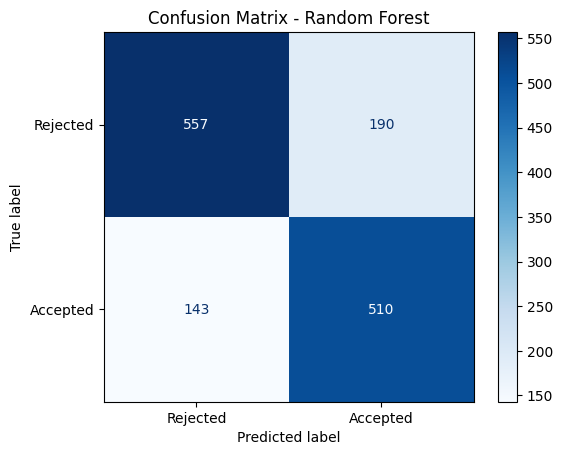

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
disp_rf.plot(cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.show()

In [44]:
dt_model = DecisionTreeClassifier(max_depth=3)  # Limit the depth for better visualization
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

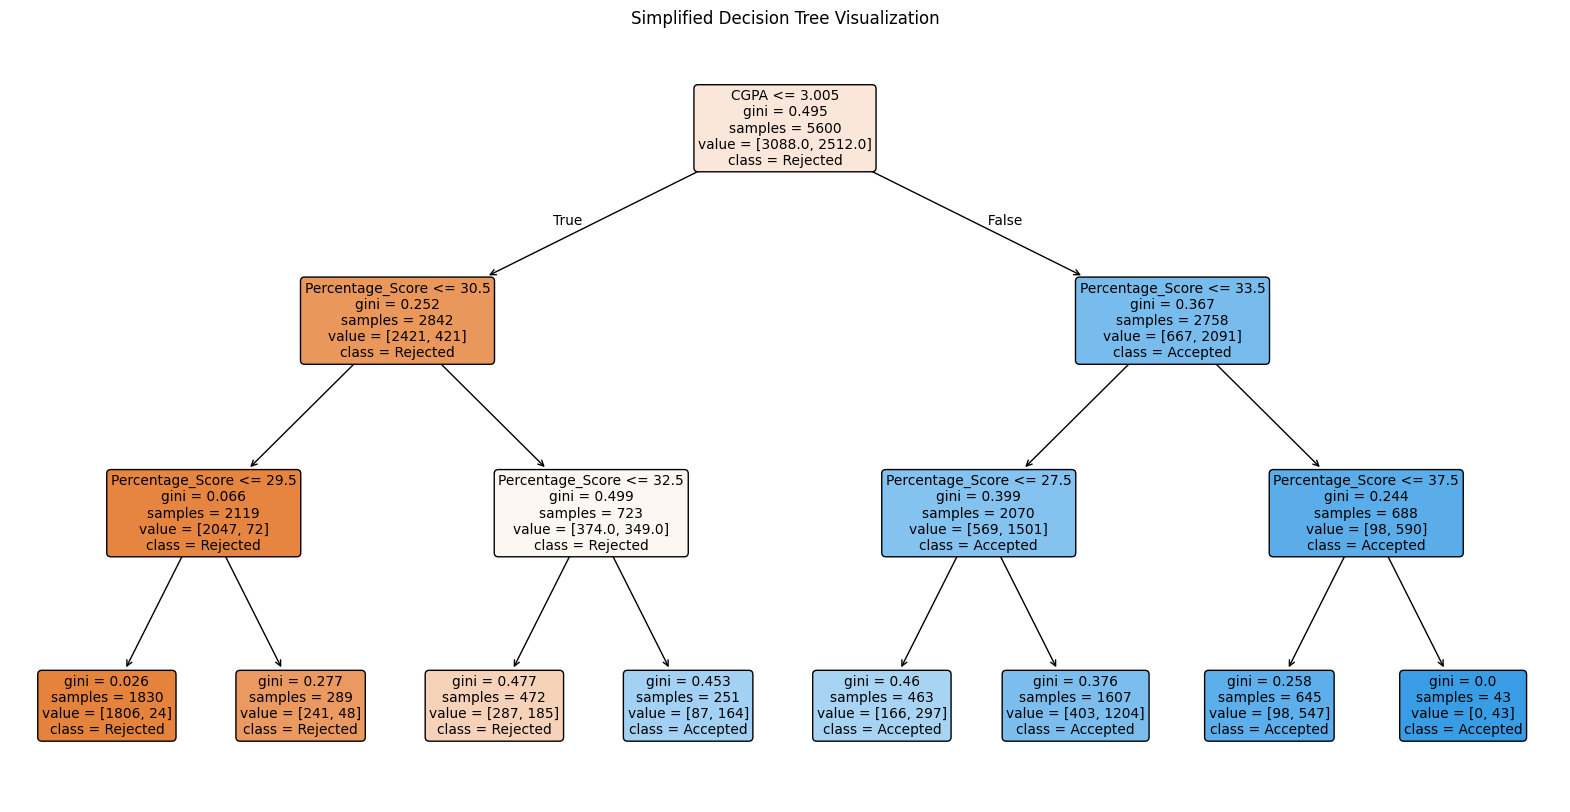

In [45]:
plt.figure(figsize=(20, 10))
plot_tree(dt_model, filled=True, feature_names=['CGPA', 'Percentage_Score', 'Duration_of_Internship_or_Job'], class_names=['Rejected', 'Accepted'], rounded=True)
plt.title('Simplified Decision Tree Visualization')
plt.show()

In [23]:
# Train the Decision Tree model
dt_model = DecisionTreeClassifier(max_depth=3,random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [24]:
# Predict on the test set using Decision Tree
y_pred_dt = dt_model.predict(X_test)


In [25]:
# Confusion Matrix for Decision Tree model
cm = confusion_matrix(y_test, y_pred_dt)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Rejected', 'Accepted'])


<Figure size 800x600 with 0 Axes>

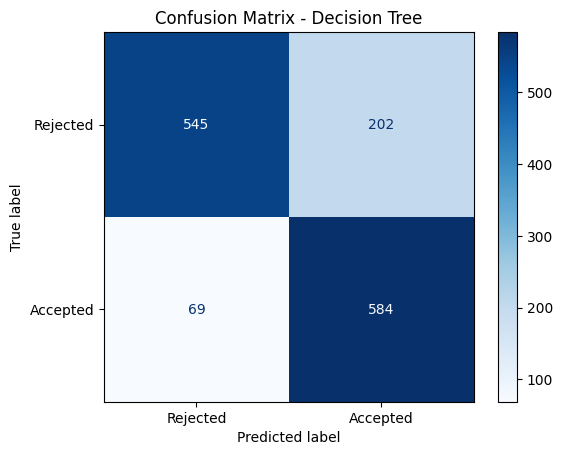

In [26]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - Decision Tree')
plt.show()


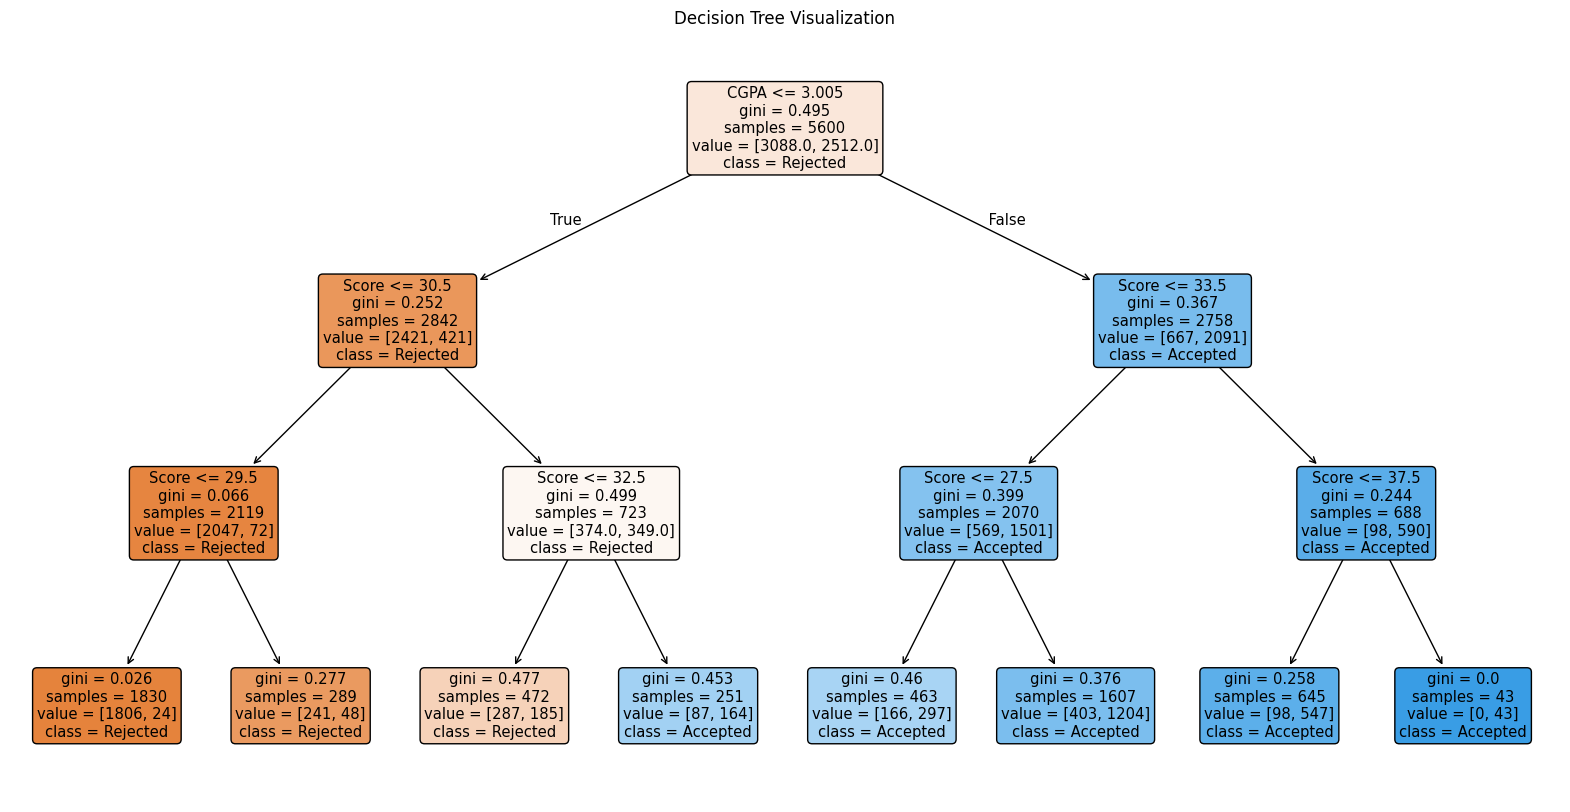

In [27]:
# Plot the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model, filled=True, feature_names=['CGPA', 'Score'], class_names=['Rejected', 'Accepted'], rounded=True)
plt.title('Decision Tree Visualization')
plt.show()

In [28]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [29]:
# Display the evaluation metrics
print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print('Classification Report:')
print(report)

Accuracy: 76.21%
Precision: 72.86%
Recall: 78.10%
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.75      0.77       747
           1       0.73      0.78      0.75       653

    accuracy                           0.76      1400
   macro avg       0.76      0.76      0.76      1400
weighted avg       0.76      0.76      0.76      1400



In [30]:
# Decision Tree model evaluation
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
report_dt = classification_report(y_test, y_pred_dt)


In [31]:
# Display the Decision Tree evaluation metrics
print(f'Accuracy (Decision Tree): {accuracy_dt * 100:.2f}%')
print(f'Precision (Decision Tree): {precision_dt * 100:.2f}%')
print(f'Recall (Decision Tree): {recall_dt * 100:.2f}%')
print('Classification Report (Decision Tree):')
print(report_dt)

Accuracy (Decision Tree): 80.64%
Precision (Decision Tree): 74.30%
Recall (Decision Tree): 89.43%
Classification Report (Decision Tree):
              precision    recall  f1-score   support

           0       0.89      0.73      0.80       747
           1       0.74      0.89      0.81       653

    accuracy                           0.81      1400
   macro avg       0.82      0.81      0.81      1400
weighted avg       0.82      0.81      0.81      1400

